## Based on the paper 
https://www.cs.utexas.edu/~ml/papers/cbcf-aaai-02.pdf

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [21]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")
tags = pd.read_csv("ml-latest-small/tags.csv")

In [22]:
tags = tags.drop("timestamp", axis=1)
ratings = ratings.drop("timestamp", axis=1)

In [23]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [347]:
ratings["userId"].nunique()

610

In [26]:
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [32]:
tags["movieId"].nunique()

1572

In [27]:
ratetable = ratings.pivot_table(index=["userId"], columns=["movieId"], values="rating")
ratetable.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
9724 - ratetable.isnull().sum(axis=1)

userId
1       232
2        29
3        39
4       216
5        44
6       314
7       152
8        47
9        46
10      140
11       64
12       32
13       31
14       48
15      135
16       98
17      105
18      502
19      703
20      242
21      443
22      119
23      121
24      110
25       26
26       21
27      135
28      570
29       81
30       34
       ... 
581      40
582      56
583      56
584      83
585      61
586     208
587     165
588      56
589      40
590     728
591      54
592      94
593     103
594     232
595      20
596     411
597     443
598      21
599    2478
600     763
601     101
602     135
603     943
604     100
605     221
606    1115
607     187
608     831
609      37
610    1302
Length: 610, dtype: int64

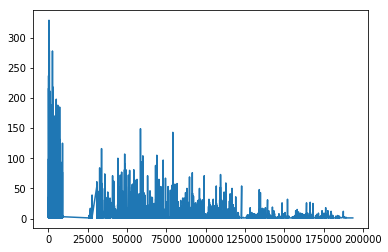

In [349]:
quantity = 610 - ratetable.isnull().sum(axis=0)
movieid = ratetable.columns
plt.plot(movieid, quantity)

In [356]:
q = quantity<2
q.

9724

In [320]:
9724-ratetable.loc[21].isnull().sum()

443

### Using pure content based
Using naive bayes to create pseudo rating

In [33]:
from sklearn.model_selection import train_test_split

In [54]:
movies["lis"] = movies.apply(lambda r: list(r.genres.split("|")),axis=1)
# genredict = movies.apply(lambda r: {r.movieId : list(r.genres.split("|"))},axis=1)
movies.head()

,movieId,title,genres,lis
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [89]:
genredict = {}
genredictstr = {}
for i,r in movies.iterrows():
    genredict[r.movieId] = r.lis
    genredictstr[r.movieId] = " ".join(r.lis)
type(genredict[1])

list

In [321]:
# for user 1
value = []
valueagg = []
label = []
labelagg = []
col = ratetable.columns
for c in col:
    if not math.isnan(ratetable.loc[21][c]):
#         listofgenre = movies[movies.movieId == c]["lis"]
        value.extend(genredict[c])
        valueagg.append([genredictstr[c]])
        label.extend([ratetable.loc[21][c]]*len(genredict[c]))
        labelagg.append(ratetable.loc[21][c])
print(value)
print(labelagg)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Adventure', 'Children', 'Fantasy', 'Action', 'Adventure', 'Thriller', 'Comedy', 'Children', 'Comedy', 'Action', 'Adventure', 'Fantasy', 'Animation', 'Children', 'Drama', 'Musical', 'Romance', 'Action', 'Comedy', 'Crime', 'Drama', 'Thriller', 'Action', 'Crime', 'Thriller', 'Action', 'Adventure', 'Crime', 'Thriller', 'Action', 'Adventure', 'Sci-Fi', 'Action', 'Crime', 'Drama', 'Thriller', 'Comedy', 'Crime', 'Drama', 'Thriller', 'Children', 'Comedy', 'Fantasy', 'Comedy', 'Drama', 'Romance', 'War', 'Adventure', 'Animation', 'Children', 'Drama', 'Musical', 'IMAX', 'Action', 'Comedy', 'Crime', 'Fantasy', 'Action', 'Comedy', 'Comedy', 'Sci-Fi', 'Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Comedy', 'Drama', 'Action', 'Sci-Fi', 'Thriller', 'Animation', 'Children', 'Fantasy', 'Musical', 'Children', 'Comedy', 'Adventure', 'Animation', 'Children', 'Comedy', 'Musical', 'Action', 'Sci-Fi', 'Action', 'Crime', 'Thriller', 'Comedy', 'Romance

In [62]:
# col = ratetable.columns
# for c in col:
#     if not math.isnan(ratetable.iloc[1][c]):
#         print(movies[movies.movieId == c]["lis"])
#         print(type(movies[movies.movieId == c]["lis"]))

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()

In [85]:
len(allgen)

14

In [70]:
allgen = set(value)
vector.fit(allgen)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [108]:
valueagg

[['Crime Drama'],
 ['Comedy'],
 ['Drama Romance'],
 ['Action Adventure Drama'],
 ['Action Crime Thriller'],
 ['Action Crime Drama Thriller'],
 ['Action Comedy'],
 ['Crime Drama Thriller'],
 ['Action Crime Drama IMAX'],
 ['Comedy'],
 ['Action Drama War'],
 ['Action Comedy Horror'],
 ['Drama Mystery Thriller'],
 ['Comedy Documentary'],
 ['Action Crime Drama Mystery Sci-Fi Thriller IMAX'],
 ['Crime Drama Thriller'],
 ['Documentary'],
 ['Comedy'],
 ['Drama'],
 ['Action Adventure Crime IMAX'],
 ['Drama Thriller'],
 ['Action Drama Western'],
 ['Comedy Crime Drama'],
 ['Sci-Fi IMAX'],
 ['Drama'],
 ['Crime Drama Thriller'],
 ['Drama Sci-Fi Thriller'],
 ['Action Adventure Sci-Fi Thriller'],
 ['Documentary']]

In [322]:
transformedvec = [list(vector.transform(i).toarray()[0]) for i in valueagg]

In [323]:
# labelagg = [int(a) for a in labelagg]
len(labelagg)

443

In [79]:
from sklearn.model_selection import train_test_split

In [324]:
xtrain, xtest, ytrain, ytest = train_test_split(transformedvec, labelagg, test_size = 0.25)

In [325]:
ytrainr, ytestr = ytrain, ytest
ytrain = [int(i) for i in ytrain]
ytest = [int(i) for i in ytest]

In [326]:
from sklearn.naive_bayes import GaussianNB
gnbclassifier = GaussianNB()
gnbclassifier.fit(xtrain, ytrain)
gnbresult = gnbclassifier.predict(xtest)
gnbresult

array([1, 4, 0, 4, 5, 0, 0, 1, 5, 0, 1, 5, 5, 5, 0, 3, 5, 5, 5, 0, 1, 5,
       5, 5, 1, 5, 1, 1, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 4, 5, 5,
       4, 1, 4, 0, 4, 4, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 4, 5,
       5, 5, 5, 5, 4, 1, 5, 1, 5, 0, 1, 1, 4, 4, 5, 4, 4, 5, 0, 4, 5, 5,
       0, 1, 1, 5, 0, 0, 5, 5, 5, 0, 4, 5, 0, 1, 5, 5, 5, 5, 5, 5, 5, 0,
       4])

In [327]:
from sklearn.svm import SVC
svmclassifier = SVC(gamma="auto", kernel="rbf")
svmclassifier.fit(xtrain, ytrain)
svmresult = svmclassifier.predict(xtest)
svmresult

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [328]:
from sklearn.svm import SVR
svrclassifier = SVR(gamma="auto", kernel="sigmoid", C=1)
svrclassifier.fit(xtrain, ytrainr)
svrresult = svrclassifier.predict(xtest)
svrresult = np.around(svrresult)
svrresult

array([4., 3., 3., 3., 3., 3., 4., 3., 3., 4., 3., 4., 3., 3., 3., 4., 3.,
       3., 4., 3., 4., 4., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       4., 3., 3., 3., 3., 3., 3., 4., 3., 4., 4., 3., 4., 4., 3., 4., 4.,
       4., 3., 4., 4., 3., 4., 4., 4., 4., 3., 3., 3., 4., 3., 3., 3., 4.,
       4., 3., 4., 4., 3., 3., 4., 3., 3., 3., 3., 3., 4., 4., 3., 3., 4.,
       3., 4., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 3., 3., 3., 3., 3.,
       4., 3., 3., 3., 4., 3., 3., 3., 3.])

In [329]:
from sklearn.linear_model import LinearRegression as LR
lrclassifier = LR()
lrclassifier.fit(xtrain, ytrainr)
lrresult = lrclassifier.predict(xtest)
lrresult = np.around(lrresult)
lrresult

array([4., 3., 2., 3., 3., 3., 3., 3., 3., 4., 3., 4., 3., 3., 3., 5., 3.,
       3., 4., 3., 4., 4., 4., 3., 3., 3., 2., 3., 3., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 4., 3., 4., 4., 3., 4., 4., 3., 4., 4.,
       4., 3., 4., 4., 3., 3., 4., 3., 4., 3., 3., 4., 4., 3., 3., 3., 3.,
       4., 3., 4., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 4., 3., 3., 4.,
       3., 3., 3., 3., 3., 3., 3., 1., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 4., 3., 3., 2., 3.])

In [330]:
np.array(ytest)

array([4, 4, 0, 3, 2, 2, 3, 2, 3, 2, 0, 4, 4, 3, 1, 4, 4, 3, 4, 3, 3, 3,
       3, 4, 3, 2, 3, 4, 3, 1, 4, 3, 3, 1, 4, 3, 0, 2, 4, 4, 4, 3, 4, 4,
       3, 4, 3, 3, 4, 4, 4, 4, 1, 3, 4, 4, 3, 3, 3, 5, 3, 3, 5, 4, 2, 3,
       2, 3, 4, 4, 3, 0, 3, 4, 3, 4, 3, 1, 2, 4, 2, 4, 3, 4, 3, 3, 4, 3,
       3, 2, 3, 4, 3, 3, 4, 4, 4, 4, 4, 2, 3, 3, 1, 0, 3, 3, 4, 3, 2, 0,
       4])

In [292]:
# labelagg

In [331]:
list(transformedvec[0])

[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [291]:
error(lrresult, ytest)

0.8709883407113854

In [332]:
dfresult = pd.DataFrame()
dfresult["input"] = xtest
dfresult["actual"] = ytest
dfresult["gnb"] = gnbresult
dfresult["svm"] = svmresult
dfresult["svr"] = svrresult
dfresult["lr"] = lrresult

In [346]:
dfresult.head()

,input,actual,gnb,svm,svr,lr
0,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",4,1,3,4.0,4.0
1,"[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",4,4,3,3.0,3.0
2,"[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]",0,0,3,3.0,2.0
3,"[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]",3,4,3,3.0,3.0
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",2,5,3,3.0,3.0


In [236]:
def error(predictions, targets):
    return np.sqrt(((np.array(predictions) - np.array(targets)) ** 2).mean())

### Results of different algo on using content only approach

In [334]:
indexes = ["gnb", "svm", "svr", "lr"]
errorsU3 = []
for index in indexes:
    errorsU3.append(error(dfresult[index], dfresult["actual"]))

In [317]:
errorsU2 = errorsU1[4:]
errorsU1 = errorsU1[:4]

### Ratings legends are as follows
gnb = Gaussian Naive Bayes<br>
svm = Support vector machine <br>
svr = Support vector regression<br>
lr  = Linear regression<br>

Text(0, 0.5, 'Error')

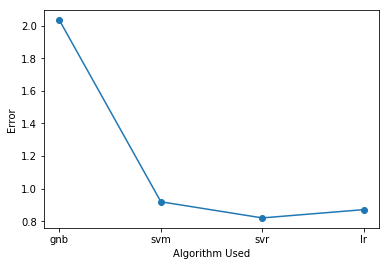

In [318]:
plt.plot(indexes, errorsU1, "-o")
plt.xlabel("Algorithm Used")
plt.ylabel("Error")
# total ratings = 256, user.loc = 1

Text(0, 0.5, 'Error')

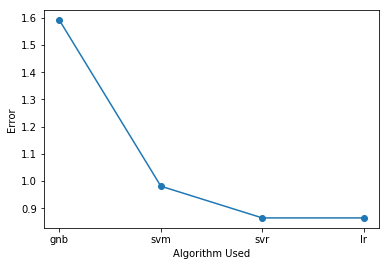

In [319]:
plt.plot(indexes, errorsU2, "-o")
plt.xlabel("Algorithm Used")
plt.ylabel("Error")
# total ratings = 314, user.loc = 6

Text(0, 0.5, 'Error')

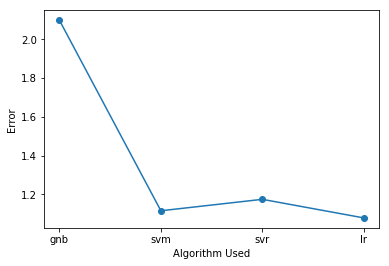

In [335]:
plt.plot(indexes, errorsU3, "-o")
plt.xlabel("Algorithm Used")
plt.ylabel("Error")
# total ratings = 443, user.loc = 21

<function matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=False, **kwargs)>

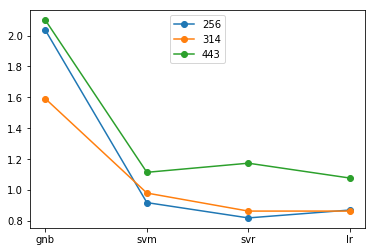

In [345]:
plt.plot(indexes, errorsU1, "-o", label="256")
plt.plot(indexes, errorsU2, "-o", label="314")
plt.plot(indexes, errorsU3, "-o", label="443")
plt.legend(loc="upper center")
plt.text

# It is clear from above, Linear regression seems to perform better in general